In [120]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [121]:
df = pd.read_csv('../data/processed/gojek_reviews_preprocessed.csv')
texts = df['cleaned'].astype(str).tolist()
labels = df['label'].tolist()

In [122]:
encode = LabelEncoder()
encoded_labels = encode.fit_transform(labels)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42)

In [124]:
bow = CountVectorizer(max_features=10000, ngram_range=(1,2))
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [125]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Accuracy: 0.8590198863636364
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.88      0.84      7246
     neutral       0.16      0.01      0.02       914
    positive       0.90      0.91      0.91     11552

    accuracy                           0.86     19712
   macro avg       0.62      0.60      0.59     19712
weighted avg       0.83      0.86      0.84     19712



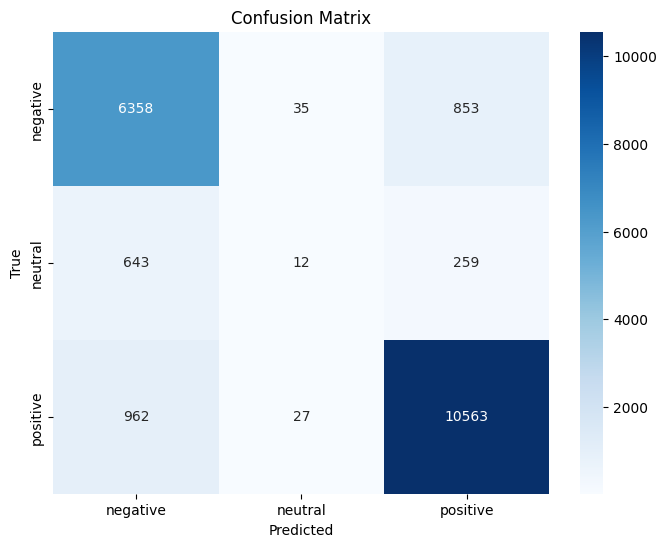

In [126]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encode.classes_))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encode.classes_, yticklabels=encode.classes_)
plt.xlabel('Predicted') 
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()